Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

In [176]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## EDA

In [177]:
df['Fraud'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [178]:
df.head(11)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [179]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Fraud            600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [181]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Fraud              0
dtype: int64

In [182]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='Work.Experience', ylabel='Taxable.Income'>

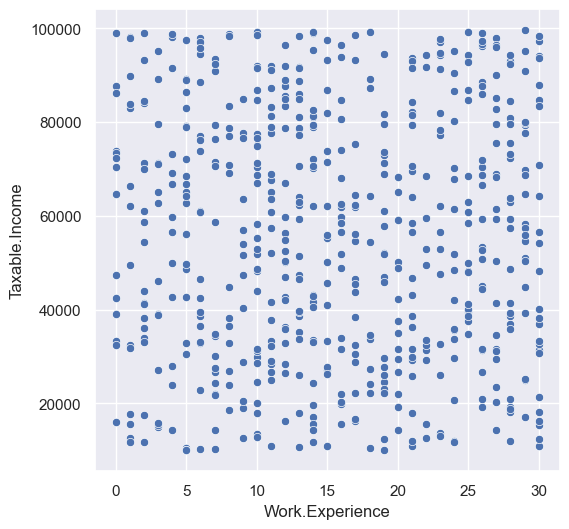

In [183]:
sns.set(rc={'figure.figsize': (6, 6), 'figure.dpi': 100})
sns.scatterplot(x=df['Work.Experience'], y=df['Taxable.Income'])

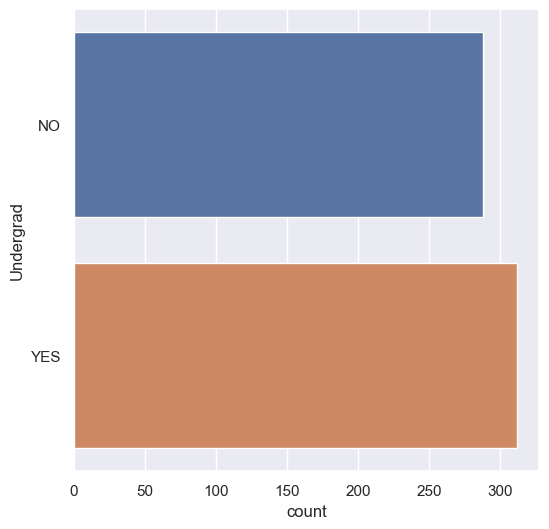

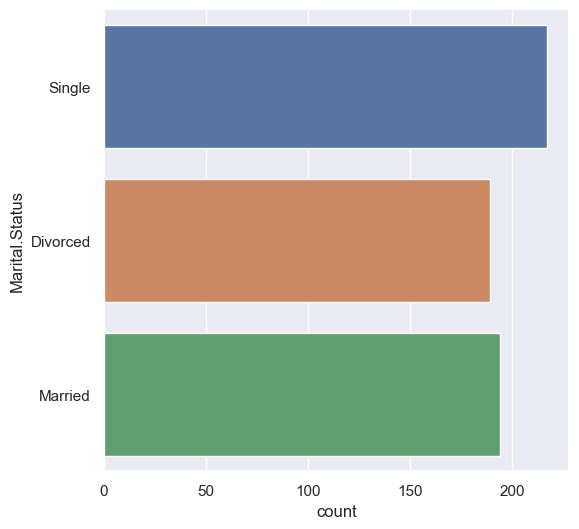

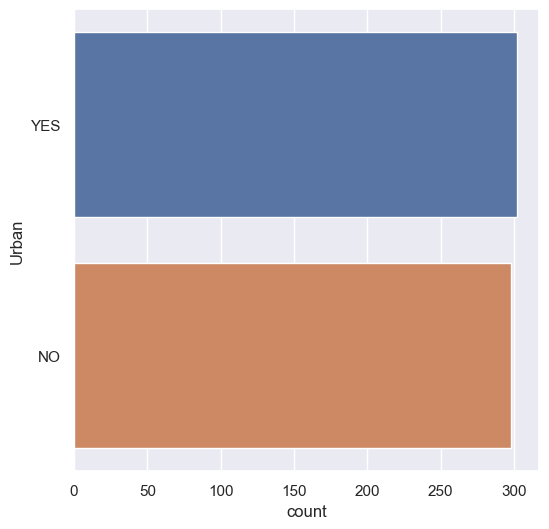

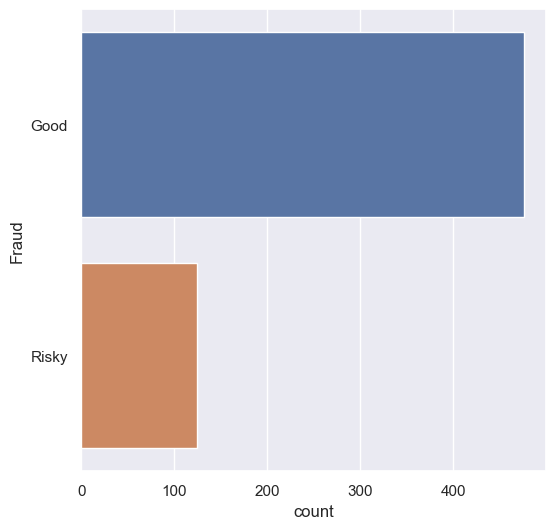

In [184]:
cat_cols = df.select_dtypes(object).columns
for col in cat_cols:
    sns.countplot(y=df[col])
    plt.show()


## Encoding

In [185]:
x = df.iloc[:, [0, 1, 3, 4, 5]]
y = df.iloc[:, -1]

In [186]:
oe = OrdinalEncoder()
le = LabelEncoder()
cat_cols = x.select_dtypes(object).columns
x[cat_cols] = oe.fit_transform(x[cat_cols])
y = le.fit_transform(y)

In [187]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,50047,10,1.0
1,1.0,0.0,134075,18,1.0
2,0.0,1.0,160205,30,1.0
3,1.0,2.0,193264,15,1.0
4,0.0,1.0,27533,28,0.0
...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0
596,1.0,0.0,55369,2,1.0
597,0.0,0.0,154058,0,1.0
598,1.0,1.0,180083,17,0.0


## Standardization

In [188]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,-1.040833,1.160800,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,1.033109,1.634639,0.993355
3,0.960769,1.160800,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,-1.630532,1.408261,-1.006689
...,...,...,...,...,...
595,0.960769,-1.274445,-1.390432,-0.968710,0.993355
596,0.960769,-1.274445,-1.071672,-1.534655,0.993355
597,-1.040833,-1.274445,0.909696,-1.761033,0.993355
598,0.960769,-0.056822,1.432197,0.163181,-1.006689


## Splitting data

In [189]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=1)

## Model Building

In [195]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=20, max_leaf_nodes=20)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       158
           1       0.00      0.00      0.00        40

    accuracy                           0.80       198
   macro avg       0.40      0.50      0.44       198
weighted avg       0.64      0.80      0.71       198



In [196]:
print("Training Accuracy:", rf.score(xtrain, ytrain))
print("Testing accuracy:", rf.score(xtest, ytest))

Training Accuracy: 0.7935323383084577
Testing accuracy: 0.797979797979798
